In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
import seaborn as sns
sns.set(style="ticks")
from pylab import rcParams

In [2]:
train = pd.read_csv('data/dengue_features_train.csv')
test = pd.read_csv('data/dengue_features_test.csv')
train_labels = pd.read_csv('data/dengue_labels_train.csv')
submission_data = pd.read_csv('data/submission_format.csv')

In [3]:
print(train.shape)
print(test.shape)
print(train_labels.shape)

(1456, 24)
(416, 24)
(1456, 4)


In [34]:
test = pd.read_csv('data/dengue_features_test.csv')

In [35]:
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [4]:
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [5]:
train_dengue = pd.merge(train,train_labels,on=['city','year','weekofyear'])

In [6]:
train_dengue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [7]:
print(train_dengue.shape)
print(test.shape)

(1456, 25)
(416, 24)


In [8]:
train_dengue.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.000000,1997.000000,2002.000000,2005.000000,2010.000000
weekofyear,1456.0,26.503434,15.019437,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,1262.0,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357
ndvi_nw,1404.0,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429
ndvi_se,1434.0,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314
ndvi_sw,1434.0,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000
reanalysis_air_temp_k,1446.0,298.701852,1.362420,294.635714,297.658929,298.646429,299.833571,302.200000
reanalysis_avg_temp_k,1446.0,299.225578,1.261715,294.892857,298.257143,299.289286,300.207143,302.928571
reanalysis_dew_point_temp_k,1446.0,295.246356,1.527810,289.642857,294.118929,295.640714,296.460000,298.450000


In [9]:
#Another way of finding null data
test.isnull().any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

### Missing data

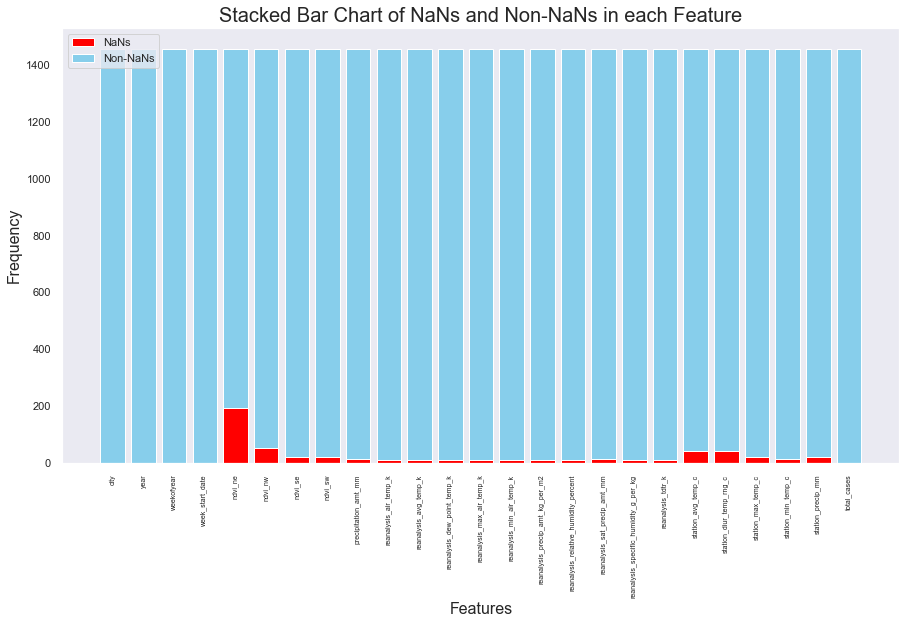

In [10]:
def find_col_nans(df):
    '''
    FUNCTION: To display stacked bar chart of the NaNs vs Non-NaNs of each column in dataframe provided.
    
    Parameters
    ----------
    df: (pandas.DataFrame) Dataframe
    
    Returns
    -------
    Nothing. Displays the Stacked Bar chart
    '''
    # Get number of NaNs for each column
    nan_count_per_col = len(df) - df.count(axis=0)
    
    # Graph configs
    rcParams['figure.figsize'] = 15, 8
    sns.set()
    
    # Create NaNs
    plt.bar(np.arange(len(df.columns)), nan_count_per_col, color='red', edgecolor='white', label='NaNs')
    
    # Create Non-NaNs
    plt.bar(np.arange(len(df.columns)), df.count(), bottom=nan_count_per_col, color='skyblue', edgecolor='white', label='Non-NaNs')
    
    plt.title('Stacked Bar Chart of NaNs and Non-NaNs in each Feature', fontsize=20)
    plt.ylabel('Frequency', fontsize=16)
    plt.xlabel('Features', fontsize=16)
    plt.xticks(np.arange(len(df.columns)), df.columns, rotation=90, fontsize=7)
    plt.grid()
    plt.legend(loc='upper left');
    
find_col_nans(train_dengue)

In [ ]:
#take care of missing data
train_dengue.fillna(train_dengue.mode().iloc[0],inplace=True)
find_col_nans(train_dengue)

In [11]:
train_dengue = train_dengue.dropna()

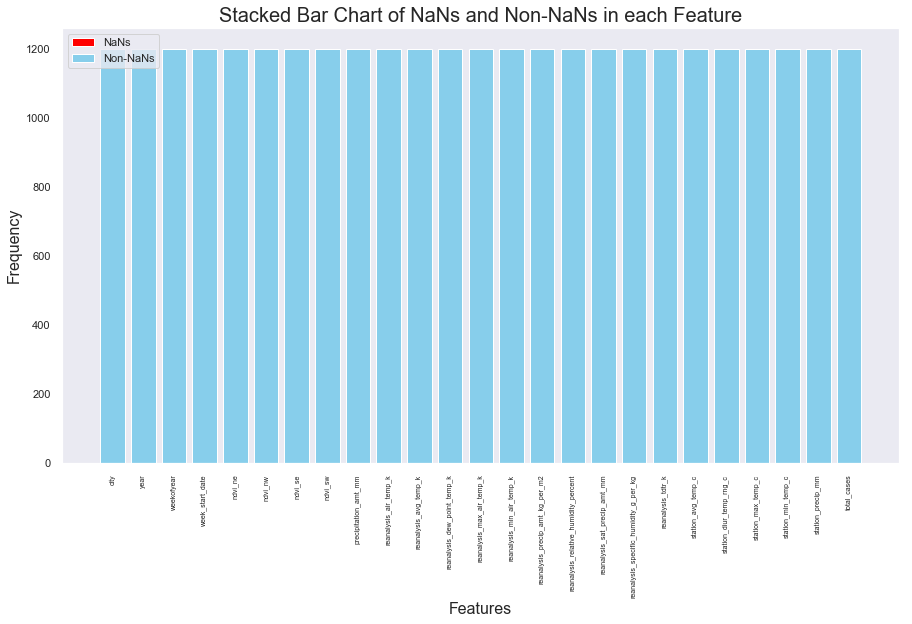

In [12]:
find_col_nans(train_dengue)

In [ ]:
train_dengue.isnull().sum()

In [13]:
train_dengue.city.value_counts()

sj    727
iq    472
Name: city, dtype: int64

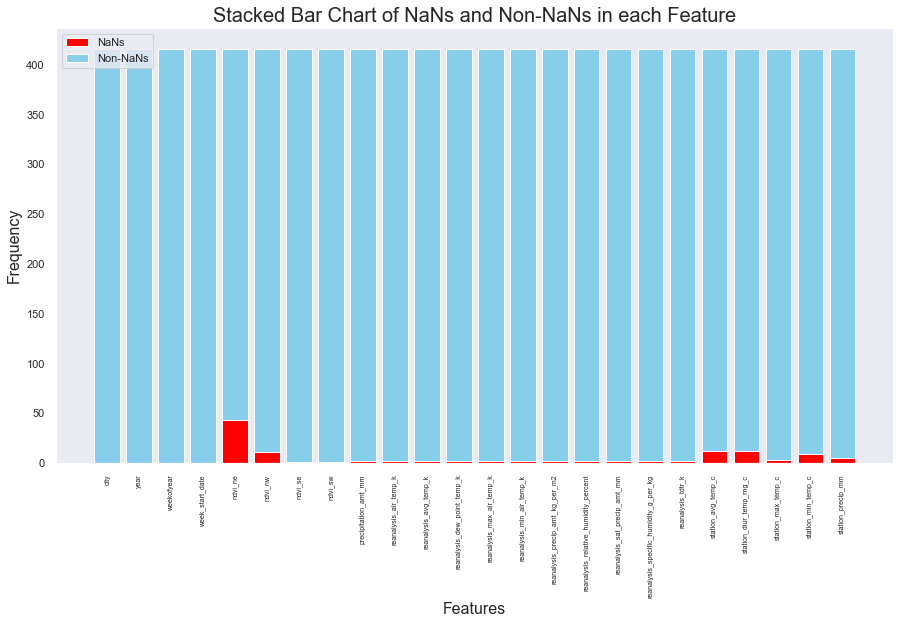

In [14]:
find_col_nans(test)

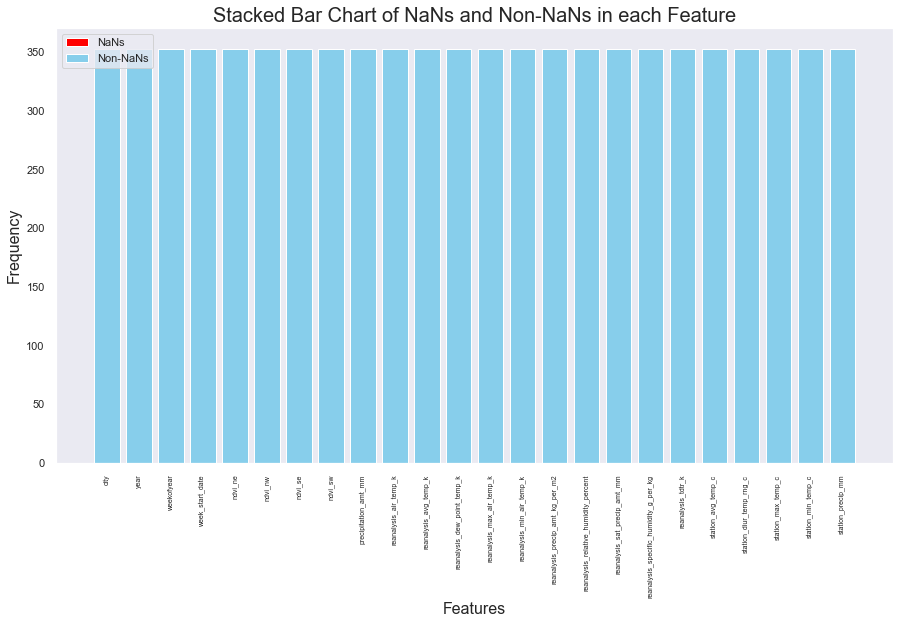

In [15]:
#take care of missing data in test
#test.fillna(test.mode().iloc[0],inplace=True)
test = test.dropna()
find_col_nans(test)

In [16]:
train_dengue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1199 non-null object
year                                     1199 non-null int64
weekofyear                               1199 non-null int64
week_start_date                          1199 non-null object
ndvi_ne                                  1199 non-null float64
ndvi_nw                                  1199 non-null float64
ndvi_se                                  1199 non-null float64
ndvi_sw                                  1199 non-null float64
precipitation_amt_mm                     1199 non-null float64
reanalysis_air_temp_k                    1199 non-null float64
reanalysis_avg_temp_k                    1199 non-null float64
reanalysis_dew_point_temp_k              1199 non-null float64
reanalysis_max_air_temp_k                1199 non-null float64
reanalysis_min_air_temp_k                1199 non-null float64
reanalysis_precip

In [ ]:
x = [train_dengue, test]
for i in x:
    i['week_start_date'] = pd.to_datetime(i['week_start_date'], format='%Y-%m-%d')
    
    i['day_start_date']=i['week_start_date'].dt.weekday
    i['year_start_date']=i['week_start_date'].dt.year
    i['quarter_start_date']=i['week_start_date'].dt.quarter
    i['month_start_date']=i['week_start_date'].dt.month

In [ ]:
train_dengue.head()

In [ ]:
train_dengue.drop('week_start_date',axis=1,inplace=True)
test.drop('week_start_date',axis=1,inplace=True)

In [17]:
train_dengue.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [18]:
train_dengue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1199 non-null object
year                                     1199 non-null int64
weekofyear                               1199 non-null int64
week_start_date                          1199 non-null object
ndvi_ne                                  1199 non-null float64
ndvi_nw                                  1199 non-null float64
ndvi_se                                  1199 non-null float64
ndvi_sw                                  1199 non-null float64
precipitation_amt_mm                     1199 non-null float64
reanalysis_air_temp_k                    1199 non-null float64
reanalysis_avg_temp_k                    1199 non-null float64
reanalysis_dew_point_temp_k              1199 non-null float64
reanalysis_max_air_temp_k                1199 non-null float64
reanalysis_min_air_temp_k                1199 non-null float64
reanalysis_precip

In [ ]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
for i in ['city']:
    train_dengue[i] = labelencoder.fit_transform(train_dengue[i])
    test[i] = labelencoder.fit_transform(test[i])

train_dengue.head()

In [ ]:
# train_dengue= pd.get_dummies(train_dengue)
# test = pd.get_dummies(test)

In [ ]:
train_dengue.head()

In [ ]:
#Training the model

In [20]:
X=train_dengue.iloc[:,4:-1]
y=train_dengue.iloc[:,-1]

In [ ]:
X = train_dengue.drop(['total_cases'],axis=1)
y = train_dengue['total_cases']

In [21]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,test_size=0.3, random_state=42)


In [25]:
from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(x_train,y_train)

In [ ]:
lr.score(x_train,y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error
#mean_absolute_error(y_test,y_pred)

In [ ]:
y_submission = lr.predict(test)

In [ ]:
y_submission = y_submission.astype('int64')
y_submission[:5]

In [ ]:
submission_data.total_cases = y_submission

In [ ]:
#Output csv file
submission_data.to_csv('lr_sub.csv',index=None,header=True)
submission_data.head()

In [ ]:
corr = train_dengue.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5}) 
plt.figure(figsize=(22,15))
# create a mask so we only see the correlation values once 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f') 
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90) 
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:
lassoreg = Lasso(alpha=.001,normalize=True,max_iter=1e5)

In [ ]:
lassoreg.fit(x_train,y_train)

In [ ]:
y_pred_lasso = lassoreg.predict(test)

In [ ]:
y_sub_lasso = y_pred_lasso.astype('int64')
y_sub_lasso[:5]

In [ ]:
submission_data.total_cases = y_sub_lasso

In [ ]:
#Output csv file
submission_data.to_csv('lassoreg_sub.csv',index=None,header=True)
submission_data.head()

In [22]:
#Normalization
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()
train_X = sc.fit_transform(X_train) 
test_X = sc.fit_transform(X_test)

In [28]:
reg_l = LinearRegression()
reg_l_fit = reg_l.fit(train_X, y_train)
reg_l_pred=reg_l_fit.predict(test_X)
MAE_l=mean_absolute_error(y_test, reg_l_pred)
print ("MAE :", MAE_l)

MAE : 16.738383008411258


In [29]:
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
5,sj,2008,23,2008-06-03,-0.0440,-0.030467,0.132000,0.083529,71.17,299.768571,...,22.55,76.557143,71.17,16.667143,2.857143,28.000000,5.171429,32.8,25.0,27.7
6,sj,2008,24,2008-06-10,-0.0443,-0.024925,0.132271,0.159157,48.99,300.062857,...,13.10,76.844286,48.99,17.010000,3.157143,27.400000,6.042857,31.1,23.3,91.7


In [36]:
final_data = test.iloc[:,4:]
final_data.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [38]:
final_data = final_data.fillna(0)

In [39]:
final_data.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,-0.0015,0.000000,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,0.0000,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [40]:
final_data.isna().sum()

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

In [41]:
final_data = sc.fit_transform(final_data)

In [43]:
predict_final = reg_l_fit.predict(final_data)
type(predict_final)

numpy.ndarray

In [44]:
len(predict_final)

416

In [45]:
y_sub_with_scaler = predict_final.astype('int64')
y_sub_with_scaler[:5]

array([17, 18, 29, 29, 35])

In [46]:
submission_data.total_cases = y_sub_with_scaler

In [47]:
#Output csv file
submission_data.to_csv('lr_sub_with_sc.csv',index=None,header=True)
submission_data.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,17
1,sj,2008,19,18
2,sj,2008,20,29
3,sj,2008,21,29
4,sj,2008,22,35
